In [12]:
%matplotlib inline

## Upfirdn notes

First play-around with the `upfirdn` python package.

In [15]:
import pylab as plt
import numpy as np
from scipy import signal
import upfirdn
from upfirdn import upfirdn as ufd

In [116]:
def db(x):
    return 10*np.log10(x)

In [16]:
print ufd.__doc__


    Upsample, FIR filter, and downsample a signal or array of signals.
    
    Parameters
    ----------
    x : array-like
        Input signal array.  May be multi-dimensional (ND).  The signals
        will be operated on along the "xdim" dimension of x.
    h : array-like
        FIR (finite-impulse response) filter coefficients array.  May be ND.
        The filters are along the "hdim" dimension of h.
    uprate : int, optional
        Upsampling rate. (default=1)
    downrate : int, optional
        Downsampling rate. (default=1)
    xdim : int, optional
        Dimension for "x" input signal array. (default=-1)
    hdim : int, optional
        Dimension for "h" coefficient array. (default=-1)
    all_samples : bool, optional
        If True, feeds in zeros after the input signal to "drain" the resampler
        and get all the non-zero samples.  (default=True)
        
    Returns
    -------
    y : float ndarray
        The output signal array.  The results of each upfirdn 

## Example test

Create some filter coefficients

(-60, 3)

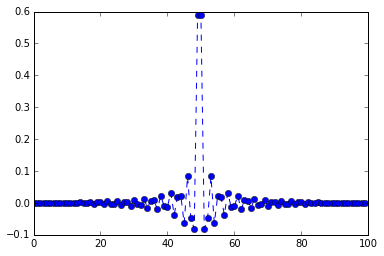

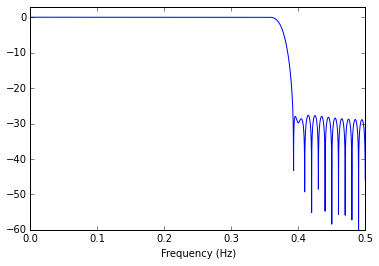

In [119]:
sample_rate_hz = 1.0
n_taps = 100
cutoff = 0.75
window = 'hamming'

nyq_rate = sample_rate_hz / 2.0
coeffs = signal.firwin(n_taps, cutoff, window=window, nyq=nyq)
plt.plot(coeffs, 'o--')

plt.figure(2)
w, h = signal.freqz(coeffs, worN=8000)
plt.plot((w/np.pi) * nyq_rate, db(np.abs(h)), linewidth=1)
plt.xlabel('Frequency (Hz)')
plt.ylim(-60, 3)


Apply the `upfirdn` filter

(100000,)
(66700,)


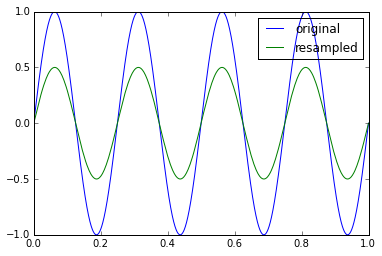

In [125]:
x = np.linspace(0, 1, 1e5)
data = np.sin(8 * np.pi * x)
data_resampled = ufd(data, coeffs, 2, 3)
x_resampled    = np.linspace(0, 1, data_resampled.shape[0])

print data.shape
print data_resampled.shape

plt.plot(x, data, label='original')
plt.plot(x_resampled, data_resampled, label='resampled')
plt.legend()

## Speed test

In [ ]:
d = np.random.random(1e8)  # Might run out of memory if too big
coeffs = signal.firwin(100, 0.5, window='hamming', nyq=1.0)
%timeit data_resampled = ufd(d, coeffs, 3, 2)
%timeit data_resampled = ufd(d, coeffs, 2, 3)
%timeit data_resampled = ufd(d, coeffs, 13, 17)
%timeit data_resampled = ufd(d, coeffs, 101, 7)

1 loops, best of 3: 4.78 s per loop
1 loops, best of 3: 3.7 s per loop
1 loops, best of 3: 1.72 s per loop